<a href="https://colab.research.google.com/github/javachka11/Laba_1/blob/main/Sem6_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт библиотек**

In [1]:
from typing import List
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from decimal import Decimal

# **Разностное решение (1-го и 2-го порядков) волновой задачи**

In [2]:
def uniform_net(a, b, h):
  step = (b - a) / ((b - a) / h) # шаг сетки
  nodes = []
  nodes.append(a)
  x = a
  while x != b:
    x = Decimal(str(x)) + Decimal(str(step))
    nodes.append(float(x))
  return nodes

def wave_task(t0, a, b, coef, func, u_x0, ut_x0, border_coeffs_a, border_coeffs_b):
  return (t0, a, b, coef, func, u_x0, ut_x0, border_coeffs_a, border_coeffs_b)

def left_border_1(t, wt, h, a):
  res1 = (wt[7][2](t) - wt[7][0] * a / h)
  res2 = (-wt[7][0] / h + wt[7][1])
  return res1 / res2

def right_border_1(t, wt, h, b):
  res1 = (wt[8][2](t) + wt[8][0] * b / h)
  res2 = (wt[8][0] / h + wt[8][1])
  return res1 / res2

def left_border_2(t, wt, h, a1, a2):
  res1 = wt[7][2](t) - wt[7][0] / h * (2*a1 - 1/2*a2)
  res2 = -3/2 * wt[7][0] / h + wt[7][1]
  return res1 / res2

def right_border_2(t, wt, h, b1, b2):
  res1 = wt[8][2](t) + wt[8][0] / h * (2*b1 - 1/2*b2)
  res2 = 3/2 * wt[8][0] / h + wt[8][1]
  return res1 / res2

def right_border_2(t, wt, h, b1, b2, b3):
  res1 = 5*wt[8][0]*wt[3]/h**2 + 2*wt[8][1]/h
  res2 = -4*wt[8][0]*wt[3]/h**2 - wt[8][1]/(2*h)
  res3 = wt[8][0]*wt[3]/h**2
  res4 = 2*wt[8][0]*wt[3]/h**2 + 3*wt[8][1]/(2*h) + wt[8][2]
  return (res1*b1 + res2*b2 + res3*b3 + wt[8][3](t)) / res4

def solver_1(t, wt, net, arr, h, tau):
  if t == wt[0]:
    arr[0] = [wt[5](x) for x in net]
    arr[2] = [y for y in arr[0]]
  elif t == wt[0] + tau:
    arr[1] = [wt[6](x) for x in net]
    for i in range(len(net)):
      arr[1][i] = tau * arr[1][i] + arr[0][i]
    arr[2] = [y for y in arr[1]]
  else:
    f_arr = [wt[4](x, t-tau) for x in net]
    for i in range(1, len(net)-1):
      arr[2][i] = ((wt[3]*(tau**2)/(h**2))*(arr[1][i+1] - 2*arr[1][i] + arr[1][i-1]) + 
                   (tau**2)*f_arr[i] + 2*arr[1][i] - arr[0][i])
    arr[2][0] = left_border_1(t, wt, h, arr[2][1])
    arr[2][-1] = right_border_1(t, wt, h, arr[2][-2])
    arr[0] = [x for x in arr[1]]
    arr[1] = [x for x in arr[2]]

def solver_2(t, wt, net, arr, h, tau):
  if t == wt[0]:
    arr[0] = [wt[5](x) for x in net]
    arr[2] = [y for y in arr[0]]
  elif t == wt[0] + tau:
    arr[1] = [wt[6](x) for x in net]
    f_arr_t0 = [wt[4](x, wt[0]) for x in net]
    for i in range(1, len(net)-1):
      arr[1][i] = (tau**2 * wt[3]/(2 * h**2) * (arr[0][i-1] - 2*arr[0][i] + arr[0][i+1]) + 
                 tau**2/2 * f_arr_t0[i] + tau * arr[1][i] + arr[0][i])
    arr[1][0] = (tau**2 * wt[3]/(2 * h**2) * (2*arr[0][0] - 5*arr[0][1] + 4*arr[0][2] - arr[0][3]) + 
                 tau**2/2 * f_arr_t0[0] + tau * arr[1][0] + arr[0][0])
    arr[1][-1] = (tau**2 * wt[3]/(2 * h**2) * (2*arr[0][-1] - 5*arr[0][-2] + 4*arr[0][-3] - arr[0][-4]) + 
                 tau**2/2 * f_arr_t0[-1] + tau * arr[1][-1] + arr[0][-1])
    arr[2] = [y for y in arr[1]]
  else:
    f_arr = [wt[4](x, t-tau) for x in net]
    for i in range(1, len(net)-1):
      arr[2][i] = ((wt[3]*tau**2/h**2)*(arr[1][i+1] - 2*arr[1][i] + arr[1][i-1]) + 
                   (tau**2)*f_arr[i] + 2*arr[1][i] - arr[0][i])
    arr[2][0] = left_border_2(t, wt, h, arr[2][1], arr[2][2])
    if (len(wt[8]) == 3):
      arr[2][-1] = right_border_2(t, wt, h, arr[2][-2], arr[2][-3])
    else:
      arr[2][-1] = right_border_2(t, wt, h, arr[2][-2], arr[2][-3], arr[2][-4])
    
    arr[0] = [x for x in arr[1]]
    arr[1] = [x for x in arr[2]]

def solver(t, wt, net, arr, h, tau, order, ax, max_val=2.5):
  if order == 1:
    solver_1(t, wt, net, arr, h, tau)
    ax.clear()
    x1,x2,y1,y2 = ax.axis()
    ax.axis((x1,x2,-max_val, max_val))
    line = ax.plot(net, arr[2])
    return line
  elif order == 2:
    solver_2(t, wt, net, arr, h, tau)
    ax.clear()
    x1,x2,y1,y2 = ax.axis()
    ax.axis((x1,x2,-max_val, max_val))
    line = ax.plot(net, arr[2])
    return line
  else:
    print('error!')

def ans(t, net, ax):
  y_arr = [2*math.sin(t + net[i]) for i in range(len(net))]
  ax.clear()
  x1,x2,y1,y2 = ax.axis()  
  ax.axis((x1,x2,-2, 2))
  line = ax.plot(net, y_arr)
  return line

def abs_error(arr1, arr2):
  assert len(arr1)==len(arr2)
  array = [math.fabs(arr1[i] - arr2[i]) for i in range(len(arr1))]
  return array

def abs_arr(arr):
  return [math.fabs(arr[i]) for i in range(len(arr))]

# **Основная задача**

**Условие задачи**

In [ ]:
ex1_аa = 1/2

def ex1_f(x, t):
  return -math.sin(x+t)

def ex1_u1(x):
  return 2*math.sin(x)

def ex1_u2(x):
  return 2*math.cos(x)

def ex1_u3(t):
  return 2*(math.sin(t)-math.cos(t))

def ex1_u4(t):
  return 2*math.sin(1+t)

def ex1_res(x, t):
  return 2*math.sin(x + t)

**Строитель гифок**

In [ ]:
def main():
  fig, ax = plt.subplots()

  h = 0.1
  tau = 0.01
  
  wt = wave_task(0, 0, 1, 1/2, ex1_f, ex1_u1, ex1_u2, (-1, 1, ex1_u3), (0, 1, ex1_u4))
  t_arr = uniform_net(0, 10, tau)
  net = uniform_net(wt[1], wt[2], h)
  arr = 3*[len(net)*[0]]

  wt_animation = animation.FuncAnimation(fig,
                                      ans,
                                      frames=t_arr,
                                      fargs = (net, ax),
                                      interval = 10,
                                      repeat = False)
  wt_animation.save('wave_task_real.gif',
                    writer = 'pillow',
                    fps = 30)
  fig.clear()

  wt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (wt, net, arr, h, tau, 1, ax),
                                      interval = 10,
                                      repeat = False)
  wt_animation.save('wave_task_1.gif',
                    writer = 'pillow',
                    fps = 30)
  fig.clear()
  
  wt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (wt, net, arr, h, tau, 2, ax),
                                      interval = 10,
                                      repeat = False)
  wt_animation.save('wave_task_2.gif',
                    writer = 'pillow',
                    fps = 30)

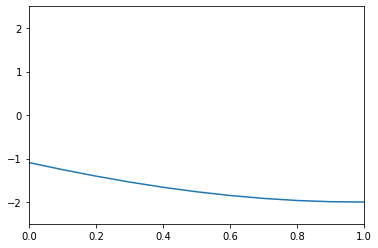

In [ ]:
main()

**Нахождение максимальной ошибки**

In [ ]:
def max_error():
  h = 0.1
  tau = 0.01

  wt = wave_task(0, 0, 1, 1/2, ex1_f, ex1_u1, ex1_u2, (-1, 1, ex1_u3), (0, 1, ex1_u4))
  t_arr = uniform_net(0, 10, tau)
  net = uniform_net(wt[1], wt[2], h)
  arr = 3*[len(net)*[0]]
  max_err_1 = []
  max_err_2 = []

  for i in range(len(t_arr)):
    res = [ex1_res(x, t_arr[i]) for x in net]
    solver(t_arr[i], wt, net, arr, h, tau, 1)
    err_1 = abs_error(arr[2], res)
    max_err_1.append(max(err_1))


  for i in range(len(t_arr)):
    res = [ex1_res(x, t_arr[i]) for x in net]
    solver(t_arr[i], wt, net, arr, h, tau, 2)
    err_2 = abs_error(arr[2], res)
    max_err_2.append(max(err_2))

  print('Максимальная ошибка решения с порядками 1 и 1: ', max(max_err_1))
  print('Максимальная ошибка решения с порядками 2 и 2: ', max(max_err_2))

In [ ]:
max_error()

Максимальная ошибка решения с порядками 1 и 1:  0.11180169232468873
Максимальная ошибка решения с порядками 2 и 2:  0.01077297688921619


# **Дополнительная задача**

**Условие доп. задачи**

In [11]:
def ex2_f(x, t):
  return 0

def ex2_u1(x):
  return 0

def ex2_u2(x):
  return 0

def ex2_u3(t):
  if (0 <= t <= math.pi/10):
    return 3*math.sin(10*t)
  else:
    return 0

def ex2_u4(t):
  return 0

**Строитель гифок для решений доп. волновой задачи**

In [14]:
def new_task():
  fig, ax = plt.subplots()

  h = 0.02
  tau = 0.01

  m1 = 0
  m2 = 1
  m3 = 10000
  T = 10

  t_arr = uniform_net(0, 10, tau)
  net = uniform_net(0, 1, h)

  wt1 = wave_task(0, 0, 1, 1/2, ex2_f, ex2_u1, ex2_u2, (0, 1, ex2_u3), (m1, T, 0, ex2_u4))
  wt2 = wave_task(0, 0, 1, 1/2, ex2_f, ex2_u1, ex2_u2, (0, 1, ex2_u3), (m2, T, 0, ex2_u4))
  wt3 = wave_task(0, 0, 1, 1/2, ex2_f, ex2_u1, ex2_u2, (0, 1, ex2_u3), (m3, T, 0, ex2_u4))

  arr = 3*[len(net)*[0]]

  wt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (wt1, net, arr, h, tau, 2, ax, 5),
                                      interval = 10,
                                      repeat = False)
  wt_animation.save('wave_new_task_1.gif',
                    writer = 'pillow',
                    fps = 30)

  wt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (wt2, net, arr, h, tau, 2, ax, 5),
                                      interval = 10,
                                      repeat = False)
  wt_animation.save('wave_new_task_2.gif',
                    writer = 'pillow',
                    fps = 30)

  wt_animation = animation.FuncAnimation(fig,
                                      solver,
                                      frames=t_arr,
                                      fargs = (wt3, net, arr, h, tau, 2, ax, 5),
                                      interval = 10,
                                      repeat = False)
  wt_animation.save('wave_new_task_3.gif',
                    writer = 'pillow',
                    fps = 30)
  fig.clear()

In [15]:
new_task()

<Figure size 432x288 with 0 Axes>